# Pandas

O Pandas é uma ferramenta de manipulação de dados de alto nível, construída com base no pacote Numpy.

## Estruturas de Dados

### Series
São arrays unidimensionais capazes de armazenar qualquer tipo de dado. Os rótulos das linhas são os index.

```
s = pd.Series(dados, index = index)
```
O argumento *dados* pode ser um dicionário, uma lista, um array Numpy ou uma constante.

### DataFrames
É uma estrutura de dados tabular bidimensional com rótulos nas linhas e colunas. Como a Series, os DataFrames são capazes de armazenar qualquer tipo de dados.

```
df = pd.DataFrame(dados, index=index, columns=columns)
```
O argumento *dados* pode ser um dicionário, uma lista, um array Numpy, uma Series ou outro DataFrame.


# Importando a Base de Dados

In [2]:
import pandas as pd

In [ ]:
#Importando Dados de um aquivo csv
dados = pd.read_csv('aluguel.csv', sep=';')

In [ ]:
dados.head()

In [ ]:
type(dados)

In [ ]:
#Informações Gerais do DataFrame
dados.info()

In [ ]:
#Exibindo x primeos registros do DataFrame
#Default 5
dados.head()

# Importanto mais tipos de formatos

In [ ]:
df_json = pd.read_json('aluguel.json')
df_json

In [3]:
# Instalação da biblioteca lmxl necessária
df_html = pd.read_html('https://www.federalreserve.gov/releases/h3/current/default.htm')
type(df_html)

list

In [4]:
len(df_html)

3

In [5]:
df_html[0].head()

Date      Reserve balances required                              \
         Date Reserve balance requirements 1 Top of penalty- free band 2   
0     Month 7                        Month 7                     Month 7   
1   Aug. 2019                         134639                      148114   
2  Sept. 2019                         134707                      148188   
3   Oct. 2019                         134998                      148509   
4   Nov. 2019                         140705                      154787   

                                 Reserve balances maintained 4  \
  Bottom of penalty- free band 3                         Total   
0                        Month 7                       Month 7   
1                         121167                       1520876   
2                         121227                       1439771   
3                         121489                       1481513   
4                         126625                       1529341   

                                                                 \
  Balances maintained to satisfy reserve balance requirements 5   
0                                            Month 7              
1                                             147555              
2                                             147498              
3                                             148050              
4                                             154256              

                                                                       
  Balances maintained that exceed the top of the penalty- free band 6  
0                                            Month 7                   
1                                            1373321                   
2                                            1292273                   
3                                            1333462                   
4                                            1375085

In [ ]:
# Instalação da biblioteca openpyxl==3.0.3 necessária
df_xlsx = pd.read_excel('aluguel.xlsx')
df_xlsx

In [ ]:
#Arquivo TXT
# df_txt = pd.read_table()

# Criando Estruturas de Dados

## Series

In [ ]:
data = [1, 2, 3, 4, 5]
s = pd.Series(data)
s

In [ ]:
index = ['Linha' + str(i) for i in range(5)]
index

In [ ]:
s = pd.Series(data = data, index = index)
s

In [ ]:
data = {'Linha' + str(i) : i + 1 for i in range(5)}
data

In [ ]:
s = pd.Series(data)
s

In [ ]:
s1 = s + 2
s1

In [ ]:
s2 = s + s1
s2

## DataFrame

In [ ]:
data = [
  [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]
]
data

In [ ]:
df1 = pd.DataFrame(data = data)
df1

In [ ]:
index = ['Linha' + str(i) for i in range(3)]
index

In [ ]:
df1 = pd.DataFrame(data=data, index=index)
df1

In [ ]:
columns = ['Coluna'+str(i) for i in range(3)]
columns

In [ ]:
df1 = pd.DataFrame(data=data, index=index, columns=columns)
df1

In [ ]:
data = {
  'Coluna0':{'Linha0':1, 'Linha1':4, 'Linha2': 7},
  'Coluna1':{'Linha0':2, 'Linha1':5, 'Linha2': 8},
  'Coluna2':{'Linha0':3, 'Linha1':6, 'Linha2': 9},
  }
data

In [ ]:
df2 = pd.DataFrame(data)
df2

In [ ]:
data = [
  (1, 2, 3),
  (4, 5, 6),
  (7, 8, 9),
]
data

In [ ]:
df3 = pd.DataFrame(data=data, index=index, columns=columns)
df3

In [ ]:
df1[df1>0] = 'A'
df1

In [ ]:
df2[df2>0] = 'B'
df2

In [ ]:
df3[df3>0] = 'C'
df3

In [ ]:
df4 = pd.concat([df1, df2, df3])
df4

In [ ]:
df5 = pd.concat([df1, df2, df3], axis=1)
df5

# Informações Gerais sobre a Base de Dados

In [ ]:
#Tipo de cada coluna do DataFrame
dados.dtypes

In [ ]:
tipo_dado = pd.DataFrame(dados.dtypes, columns = ['Tipos de Dados'])
tipo_dado.columns.name = 'Variáveis'

tipo_dado

In [ ]:
#Dimensões do DataFrame
dados.shape

# Organizando DataFrame (Sort)

In [44]:
import pandas as pd

In [50]:
data = [
  [1,2,3],
  [4,5,6],
  [7,8,9]
]
data

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [51]:
list('321')

['3', '2', '1']

In [52]:
df = pd.DataFrame(data, list('321'), list('ZYX'))
df

,Z,Y,X
3,1,2,3
2,4,5,6
1,7,8,9


In [53]:
df.sort_index(inplace=True)
df

,Z,Y,X
1,7,8,9
2,4,5,6
3,1,2,3


In [55]:
df.sort_values(by=['X', 'Y'], inplace=True)
df

,Z,Y,X
3,1,2,3
2,4,5,6
1,7,8,9


In [56]:
df.sort_values(by = '3', axis = 1, inplace=True)
df

,Z,Y,X
3,1,2,3
2,4,5,6
1,7,8,9


# Formas de Seleção

In [57]:
import pandas as pd

In [60]:
data = [
  (1, 2, 3, 4),
  (5, 6, 7, 8),
  (9, 10, 11, 12),
  (13, 14, 15, 16)
]
df = pd.DataFrame(data, 'l1 l2 l3 l4'.split(), 'c1 c2 c3 c4'.split())
df

,c1,c2,c3,c4
l1,1,2,3,4
l2,5,6,7,8
l3,9,10,11,12
l4,13,14,15,16


In [61]:
type(df['c1'])

pandas.core.series.Series

In [62]:
type(df[['c3', 'c4']])

pandas.core.frame.DataFrame

In [66]:
df[1:3]

,c1,c2,c3,c4
l2,5,6,7,8
l3,9,10,11,12


In [67]:
df[1:][['c3', 'c1']]

,c3,c1
l2,7,5
l3,11,9
l4,15,13


In [68]:
df

,c1,c2,c3,c4
l1,1,2,3,4
l2,5,6,7,8
l3,9,10,11,12
l4,13,14,15,16


In [69]:
df.loc['l3']

c1     9
c2    10
c3    11
c4    12
Name: l3, dtype: int64

In [70]:
df.loc[['l3', 'l2']]

,c1,c2,c3,c4
l3,9,10,11,12
l2,5,6,7,8


In [71]:
df.loc['l1', 'c2']

2

In [72]:
df.iloc[0, 1]

2

In [73]:
df.loc[['l3', 'l1'], ['c4', 'c1']]

,c4,c1
l3,12,9
l1,4,1


In [74]:
df.iloc[[2, 0], [3, 0]]

,c4,c1
l3,12,9
l1,4,1


# Métodos de Interpolação

In [75]:
import pandas as pd

In [76]:
data = [0.5, None, None, 0.52, 0.54, None, None, 0.59, 0.6, None, 0.7]
s = pd.Series(data)
s

0     0.50
1      NaN
2      NaN
3     0.52
4     0.54
5      NaN
6      NaN
7     0.59
8     0.60
9      NaN
10    0.70
dtype: float64

**A função *fillna()* preenche automaticamente todos os registros nulos**

**A função tem três parametros principais:** 

**- *value*: corresponde ao valor que será aplicado a todos os registros nulos**

**- *method*: são os métodos de subistituição dos registros nulos {‘bfill’, ‘ffill’, None}, valor padrão é None**

**- *limit*: é a quantidade de registros seguidos que serão atualizados**

Ambos os métodos preenche os dados Null com o dados anterior porém iniciando em ordens diferentes

bfill -> inicia de cima para baixo

ffill -> inicia de baixo para cima

In [78]:
s.fillna(0)

0     0.50
1     0.00
2     0.00
3     0.52
4     0.54
5     0.00
6     0.00
7     0.59
8     0.60
9     0.00
10    0.70
dtype: float64

In [79]:
s.fillna(method = 'ffill')

0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

In [80]:
s.fillna(method = 'bfill')

0     0.50
1     0.52
2     0.52
3     0.52
4     0.54
5     0.59
6     0.59
7     0.59
8     0.60
9     0.70
10    0.70
dtype: float64

In [81]:
s.fillna(s.mean())

0     0.500
1     0.575
2     0.575
3     0.520
4     0.540
5     0.575
6     0.575
7     0.590
8     0.600
9     0.575
10    0.700
dtype: float64

In [84]:
s1 = s.fillna(method = 'ffill', limit=1)
s1

0     0.50
1     0.50
2      NaN
3     0.52
4     0.54
5     0.54
6      NaN
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

In [85]:
s1.fillna(method='bfill', limit=1)

0     0.50
1     0.50
2     0.52
3     0.52
4     0.54
5     0.54
6     0.59
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

# Contadores

In [86]:
import pandas as pd

In [90]:
s = pd.Series(list('qqwedswhuqqnsagqw'))
s

0     q
1     q
2     w
3     e
4     d
5     s
6     w
7     h
8     u
9     q
10    q
11    n
12    s
13    a
14    g
15    q
16    w
dtype: object

In [91]:
s.unique()

array(['q', 'w', 'e', 'd', 's', 'h', 'u', 'n', 'a', 'g'], dtype=object)

In [92]:
s.value_counts()

q    5
w    3
s    2
e    1
d    1
h    1
u    1
n    1
a    1
g    1
dtype: int64

In [93]:
dados = pd.read_csv('aluguel.csv', sep=';')

In [94]:
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [95]:
dados.Tipo.value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

# Criando Faixas de Valor

In [96]:
import pandas as pd

In [97]:
dados = pd.read_csv('aluguel.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [98]:
# 1 - 2
# 3 - 4
# 5 - 6
# 7 - mais
classes = [0, 2, 4, 6, 100]
quartos = pd.cut(dados.Quartos, classes)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2               NaN
3        (0.0, 2.0]
4        (0.0, 2.0]
            ...    
32955           NaN
32956    (2.0, 4.0]
32957    (0.0, 2.0]
32958    (0.0, 2.0]
32959           NaN
Name: Quartos, Length: 32960, dtype: category
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [101]:
pd.value_counts(quartos)

(0, 2]      12419
(2, 4]       9894
(4, 6]        709
(6, 100]       87
Name: Quartos, dtype: int64

In [102]:
labels = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']
quarto = pd.cut(dados.Quartos, classes, labels = labels)
pd.value_counts(quarto)

1 e 2 quartos        12419
3 e 4 quartos         9894
5 e 6 quartos          709
7 quartos ou mais       87
Name: Quartos, dtype: int64

In [103]:
quartos = pd.cut(dados.Quartos, classes, labels=labels, include_lowest=True)
pd.value_counts(quartos)

1 e 2 quartos        22270
3 e 4 quartos         9894
5 e 6 quartos          709
7 quartos ou mais       87
Name: Quartos, dtype: int64

# Manipulando Colunas

In [ ]:
dados.head()

In [ ]:
dados['Tipo']
dados.Tipo

In [ ]:
tipos = dados['Tipo']
tipos

In [ ]:
type(tipos)

In [ ]:
tipos.drop_duplicates()

In [ ]:
tipos

In [ ]:
# tipos = tipos.drop_duplicates()
tipos.drop_duplicates(inplace=True)

In [ ]:
tipos

In [ ]:
tipos = pd.DataFrame(tipos)
tipos.head()

In [ ]:
tipos.index

In [ ]:
tipos.shape[0]

In [ ]:
tipos.index = range(tipos.shape[0])

In [ ]:
tipos.index

In [ ]:
tipos.columns = ['Type']

In [ ]:
tipos

In [ ]:
tipos.columns.name = 'Id'

In [ ]:
tipos.head()

# Seleção de Dados

In [ ]:
dados.head()

In [ ]:
list(dados['Tipo'].drop_duplicates())

In [ ]:
residencial = ['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']
residencial

In [ ]:
selecao = dados['Tipo'].isin(residencial)
selecao

In [ ]:
dados_residenciais = dados[selecao]
dados_residenciais.head()

In [ ]:
list(dados_residenciais['Tipo'].drop_duplicates())

In [ ]:
print(dados_residenciais.shape[0])
print(dados.shape[0])

In [ ]:
dados_residenciais.index = range(dados_residenciais.shape[0])
dados_residenciais.head()

## Exportanto Dados

In [ ]:
dados_residenciais.to_csv('aluguel_residencial1.csv', sep=';')
dados_residenciais.to_csv('aluguel_residencial2.csv', sep=';', index=False)
dados_residenciais.to_csv('aluguel_residencial.csv', index=False)

# Seleções e Frequências

In [ ]:
dados = pd.read_csv('aluguel_residencial.csv')
dados.head()

Selecionando somente os imóveis classificados com o tipo 'Apartamento'

In [ ]:
selecao = dados['Tipo'] == 'Apartamento'
n1 = dados[selecao]
n1.head()


Selecionando os imóveis classificados como tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'

In [ ]:
selecao = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')
n2 = dados[selecao]
n2.head()
# n2.Tipo.drop_duplicates()

Selecionando imóveis com alugueis menores que R$ 2.000,00 e pelo menos 4 quartos

In [ ]:
selecao = (dados['Quartos'] >= 4) & (dados['Valor'] < 2000)
n3 = dados[selecao]
n3.head()

# Tratando Dados Null

In [ ]:
dados.head()

In [ ]:
dados.isnull()

In [ ]:
dados.notnull()

In [ ]:
dados.info()

In [ ]:
dados[dados['Valor'].isnull()]

In [ ]:
dados.dropna(subset = ['Valor'], inplace=True)
dados[dados['Valor'].isnull()]

In [ ]:
dados.fillna({'Condominio': 0, 'IPTU': 0}, inplace=True)
dados.head()

# Criando Novas Variáveis

In [ ]:
dados.head()

In [ ]:
dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']

In [ ]:
dados.head(10)

In [ ]:
dados['Valor m2'] = (dados['Valor'] / dados['Area']).round(2)
dados['Valor Bruto m2'] = (dados['Valor Bruto'] / dados['Area']).round(2)
dados.head(10)

In [ ]:
dados.pop('Valor Bruto m2')

In [ ]:
dados.head()

# Criando Agrupamentos

In [ ]:
dados.head()

In [ ]:
dados['Valor'].mean()

In [ ]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]
dados.head()

In [ ]:
dados['Bairro'].drop_duplicates()

In [ ]:
grupo_bairro = dados.groupby('Bairro')
type(grupo_bairro)

In [ ]:
grupo_bairro.groups

In [ ]:
for bairro, data in grupo_bairro:
  print(f'{bairro} -> {data.Valor.mean().round(2)}')

In [ ]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

## Estatísticas Descritivas

In [ ]:
grupo_bairro['Valor'].describe().round(2)

In [ ]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

In [ ]:
#Comando necessario para exibir os graficos sem a salvar antes
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
plt.rc('figure', figsize=(20,10))
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})

In [ ]:
fig = grupo_bairro['Valor'].max().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize':22})

# Identificando e Removendo Outliers

In [ ]:
plt.rc('figure', figsize=(14,6))

In [ ]:
dados.boxplot(['Valor'])

In [ ]:
dados[dados['Valor'] >= 500000]

<img src="./Box-Plot.png" height=500/>

Box-Plot é um diagrama de caixa construído utilizando as referências de valores mínimos e máximos, primeiro e terceiro quartil, mediana e outliers da base de dados.

In [ ]:
valor = dados['Valor']

In [ ]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

In [ ]:
dados_new.boxplot(['Valor'])

In [ ]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Removendo Outliers Por Tipo

In [ ]:
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

In [ ]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
  #Selecionando apenas os dados do tipo atual
  eh_tipo = dados['Tipo'] == tipo
  #Selecionando apenas se os valores estão dentro dos limites
  eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
  #Juntando as seleções
  selecao = eh_tipo & eh_dentro_limite
  #Filtrando os dados
  dados_selecao = dados[selecao]
  #Concatenando os DataFrames
  dados_new = pd.concat([dados_new, dados_selecao])

In [ ]:
dados.boxplot(['Valor'], by=['Tipo'])
dados_new.boxplot(['Valor'], by=['Tipo'])

In [ ]:
plt.rc('figure', figsize=(16,10))

dados.hist(['Valor'], by=['Tipo'])
dados_new.hist(['Valor'], by=['Tipo'])

In [ ]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', index=False)

# Mais Graficos

In [104]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(15, 8))

In [105]:
dados = pd.read_csv('aluguel.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


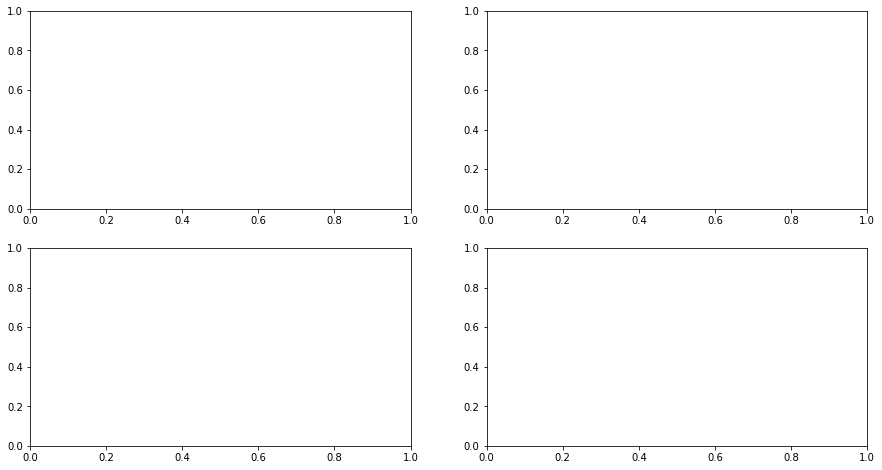

In [106]:
area = plt.figure()
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [108]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor x Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

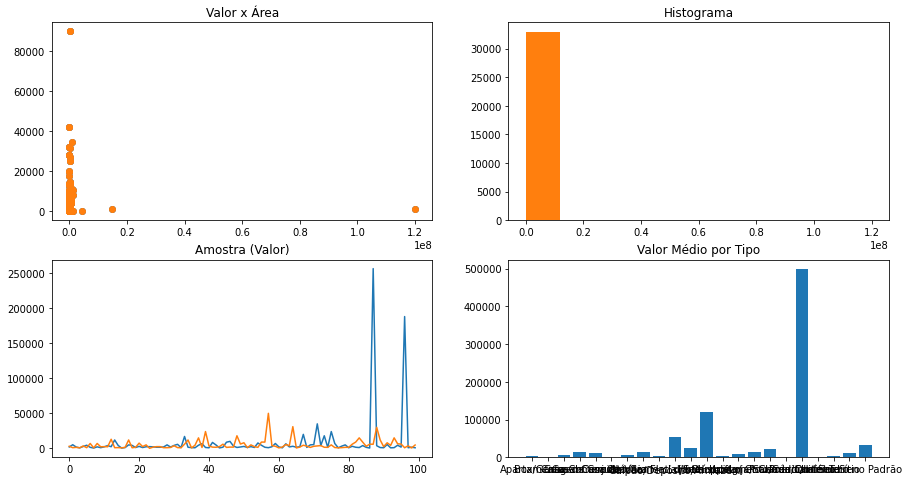

In [109]:
area

In [110]:
area.savefig('grafico.png', dpi=300, bbox_inches='tight')